In [1]:
#import dependencies
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split 
from sklearn.metrics import confusion_matrix, accuracy_score, mean_squared_error, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [2]:
#read csv file , dataset
df=pd.read_csv("diabetes.csv")

# The datasets consists of several medical predictor variables and one target variable, Outcome. Predictor variables includes the number of pregnancies the patient has had, their BMI, insulin level, age, and so on.

# Pregnancies: Number of times pregnant
# Glucose: Plasma glucose concentration a 2 hours in an oral glucose tolerance test
# BloodPressure: Diastolic blood pressure (mm Hg)
# SkinThickness: Triceps skin fold thickness (mm)
# Insulin: 2-Hour serum insulin (mu U/ml)
# BMI: Body mass index (weight in kg/(height in m)^2)
# DiabetesPedigreeFunction: Diabetes pedigree function
# Age: Age (years)
# Outcome: Class variable (0 or 1)

# EDA

In [3]:
#top 5 rows
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
# last 5 rows
df.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


In [5]:
#infromation abiut the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [6]:
#statistical analysis on the Dataset
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


In [7]:
#checking null values 
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [8]:
#checking null values in percentage
df["Outcome"].value_counts()*100/len(df)

0    65.104167
1    34.895833
Name: Outcome, dtype: float64

In [9]:
# check number of males and females that has disease
df["Outcome"].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [10]:
#correlation target variable with all features
df.corr()["Outcome"]

Pregnancies                 0.221898
Glucose                     0.466581
BloodPressure               0.065068
SkinThickness               0.074752
Insulin                     0.130548
BMI                         0.292695
DiabetesPedigreeFunction    0.173844
Age                         0.238356
Outcome                     1.000000
Name: Outcome, dtype: float64

# Some Visualization on the dataset to get insights from this

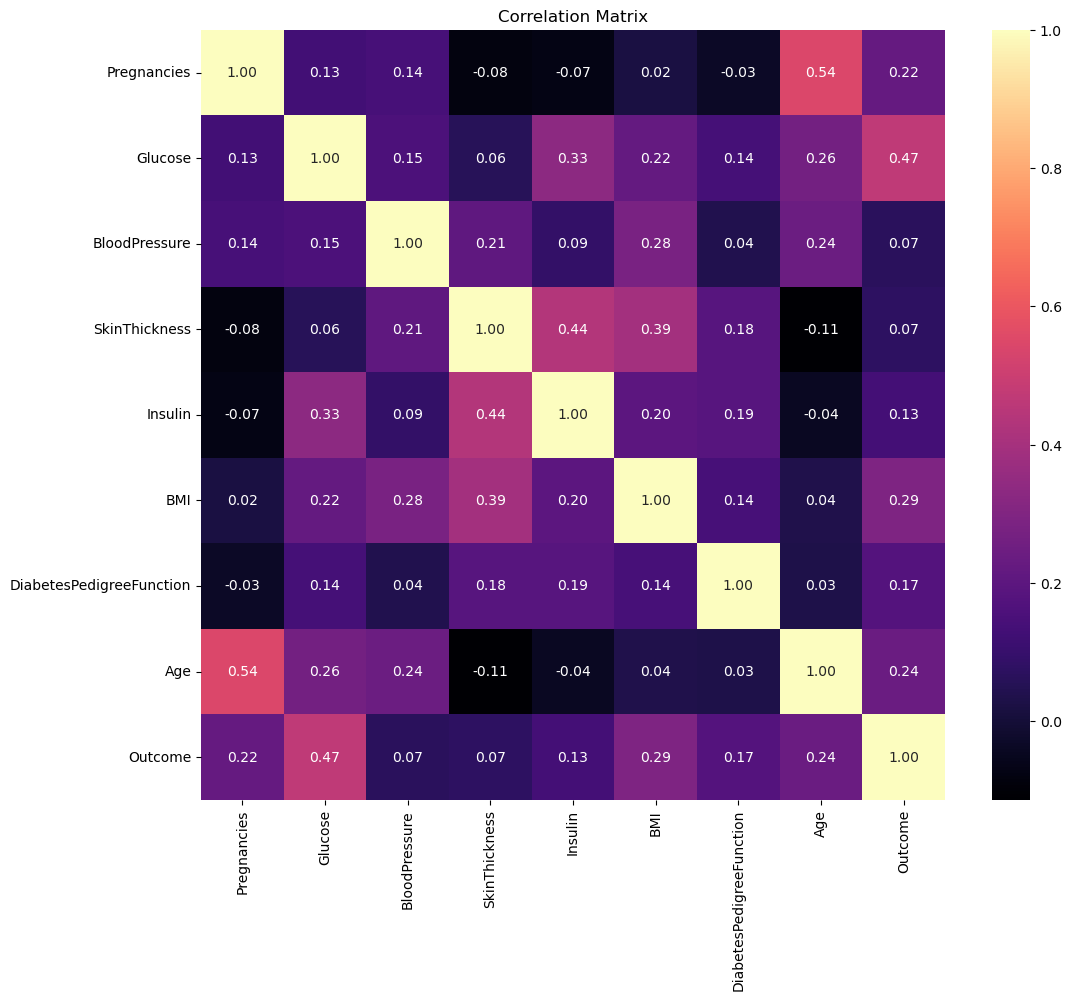

In [11]:
plt.figure(figsize=(12,10))
sns.heatmap(df.corr(),annot=True,cmap="magma",fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

C:\Users\Shoban\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:title={'center':'Age Distribution'}, xlabel='Age', ylabel='Density'>

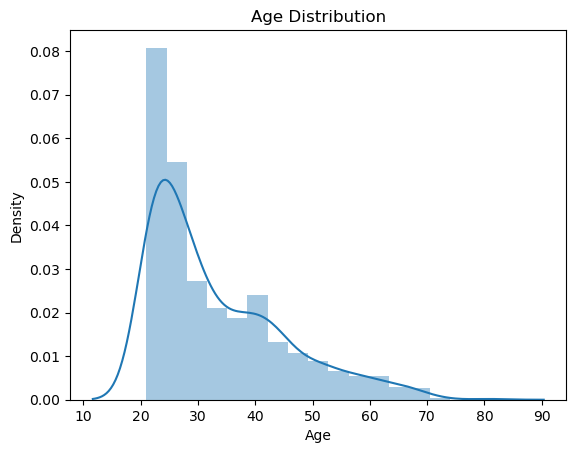

In [12]:
plt.title("Age Distribution")
sns.distplot(df["Age"])

C:\Users\Shoban\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:title={'center':'Ages_of_persons_present_disease'}, ylabel='Density'>

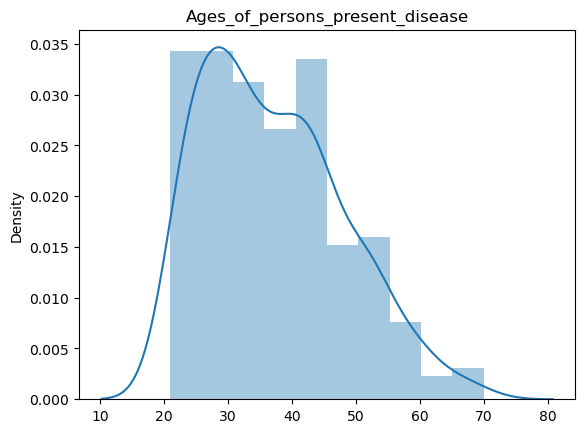

In [13]:
ages_of_persons_present_disease=df[df["Outcome"]==1]["Age"]
plt.title("Ages_of_persons_present_disease")
sns.distplot(x=ages_of_persons_present_disease)

Text(0.5, 1.0, 'Number of times pregnant and present disease or not')

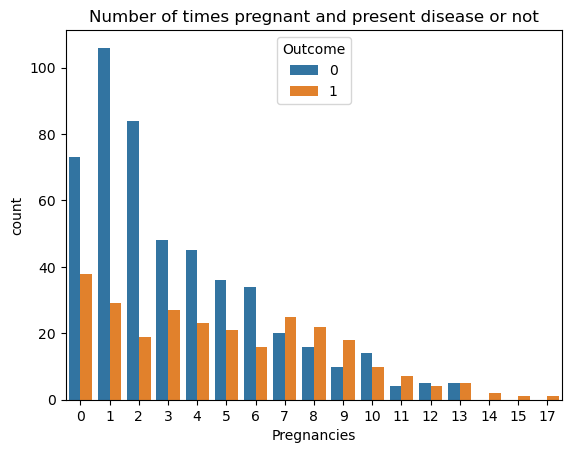

In [14]:
sns.countplot(data=df , x="Pregnancies" , hue="Outcome")
plt.title("Number of times pregnant and present disease or not")

<AxesSubplot:xlabel='Glucose', ylabel='Count'>

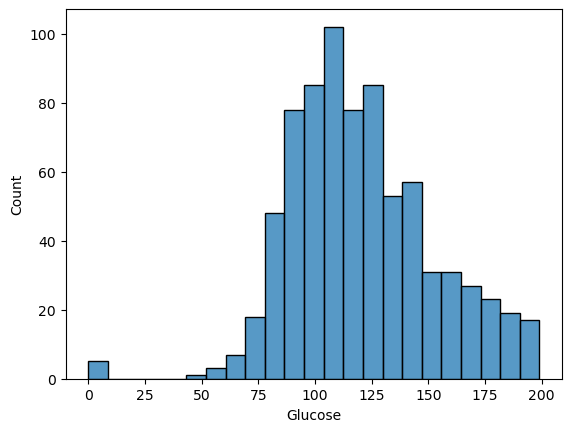

In [15]:
sns.histplot(data=df , x="Glucose"  )

<AxesSubplot:xlabel='BloodPressure'>

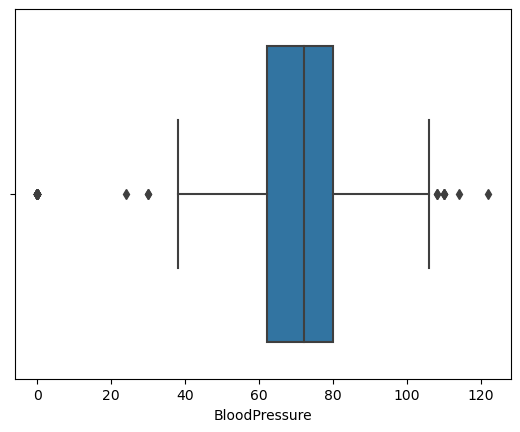

In [16]:
sns.boxplot(x="BloodPressure" ,data = df)

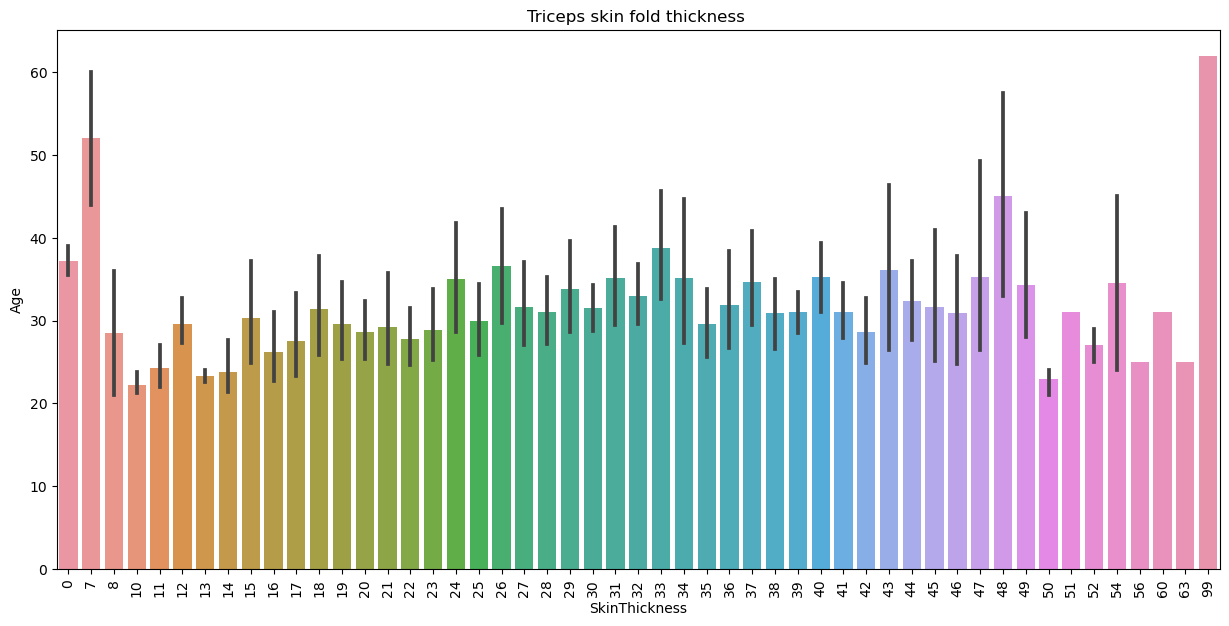

In [17]:
plt.figure(figsize=(15,7))
sns.barplot(x="SkinThickness" , y="Age" , data=df)
plt.title("Triceps skin fold thickness ")
plt.xticks(rotation="vertical")
plt.show()

C:\Users\Shoban\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


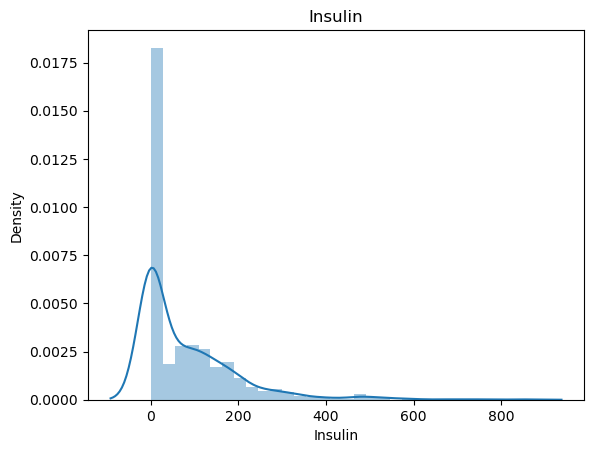

In [18]:
# df["Insulin"]
plt.title("Insulin")
sns.distplot(df["Insulin"])
plt.show()

<AxesSubplot:xlabel='Insulin'>

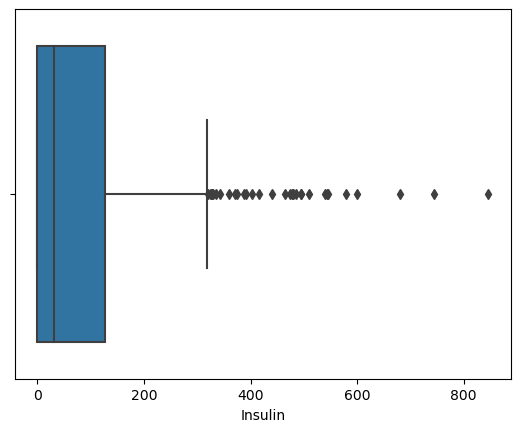

In [19]:
sns.boxplot(x="Insulin" ,data = df)

C:\Users\Shoban\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


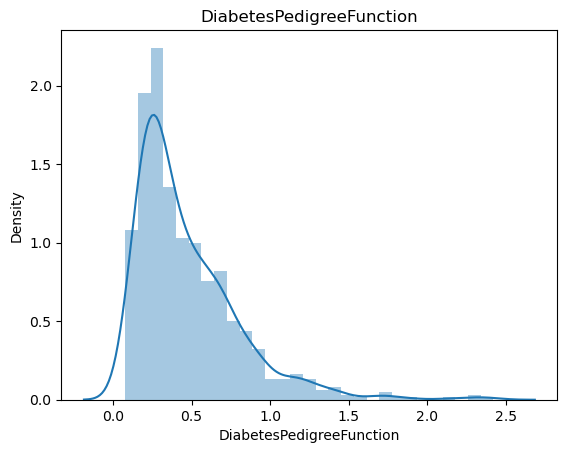

In [20]:
df["DiabetesPedigreeFunction"]
plt.title("DiabetesPedigreeFunction")
sns.distplot(df["DiabetesPedigreeFunction"])
plt.show()

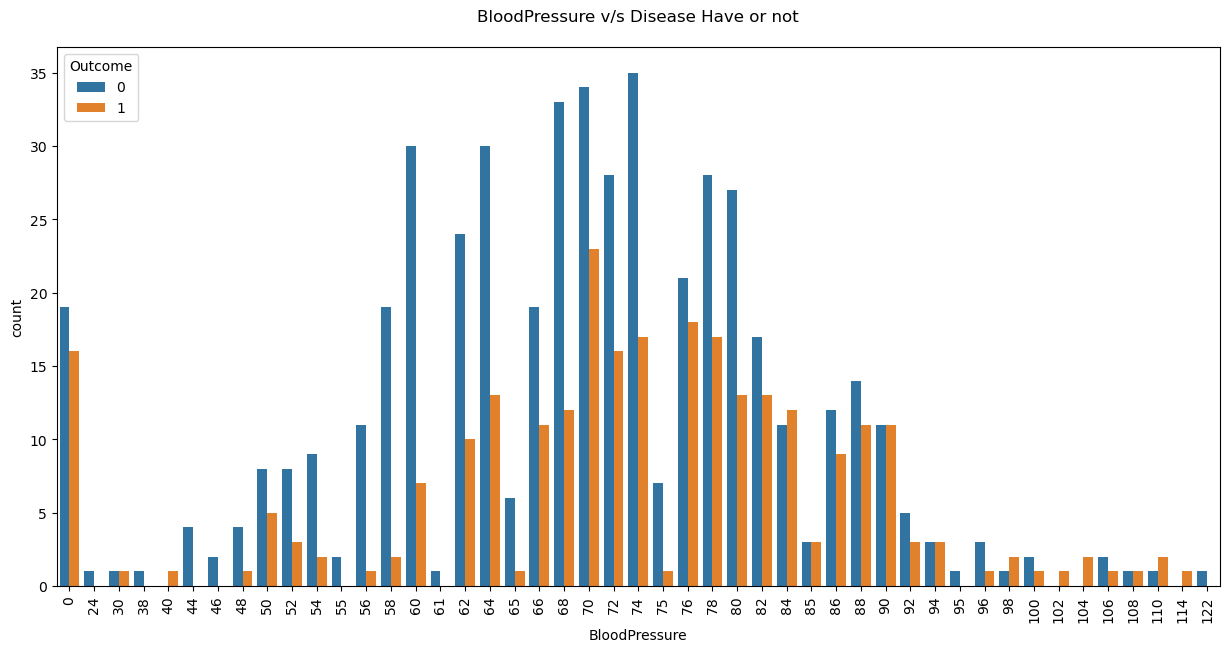

In [21]:
plt.figure(figsize=(15,7))
sns.countplot(data= df, x='BloodPressure',hue='Outcome')
plt.title('BloodPressure v/s Disease Have or not\n')
plt.xticks(rotation="vertical")
plt.show()


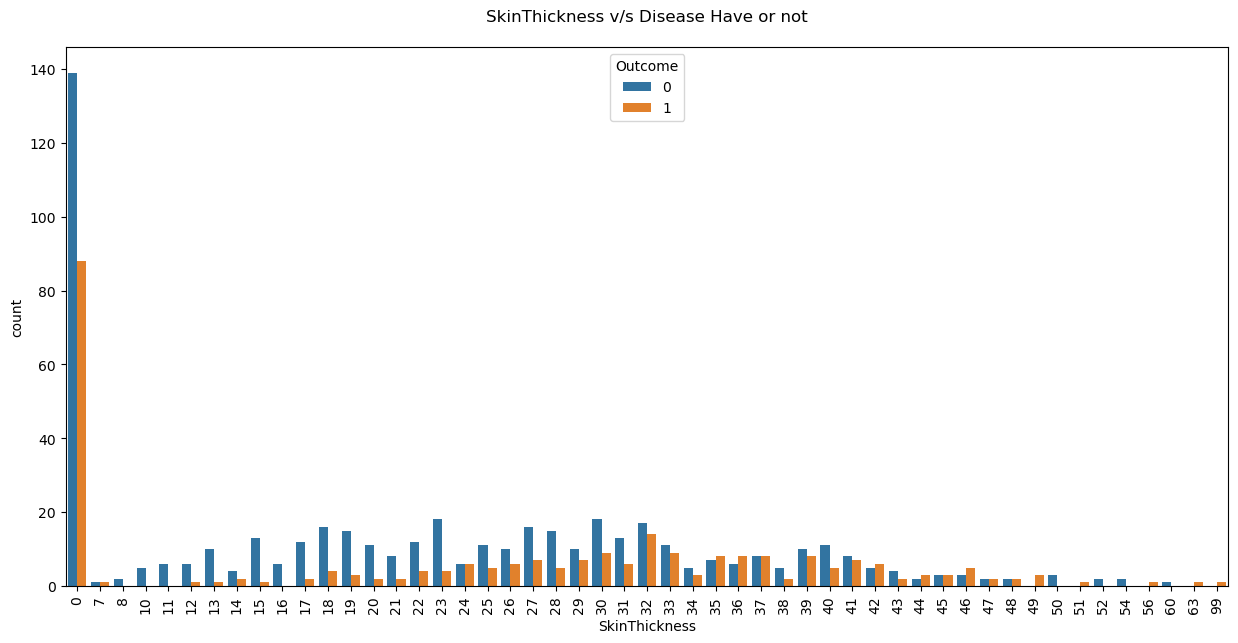

In [22]:
plt.figure(figsize=(15,7))
sns.countplot(data= df, x='SkinThickness',hue='Outcome')
plt.title('SkinThickness v/s Disease Have or not\n')
plt.xticks(rotation="vertical")
plt.show()


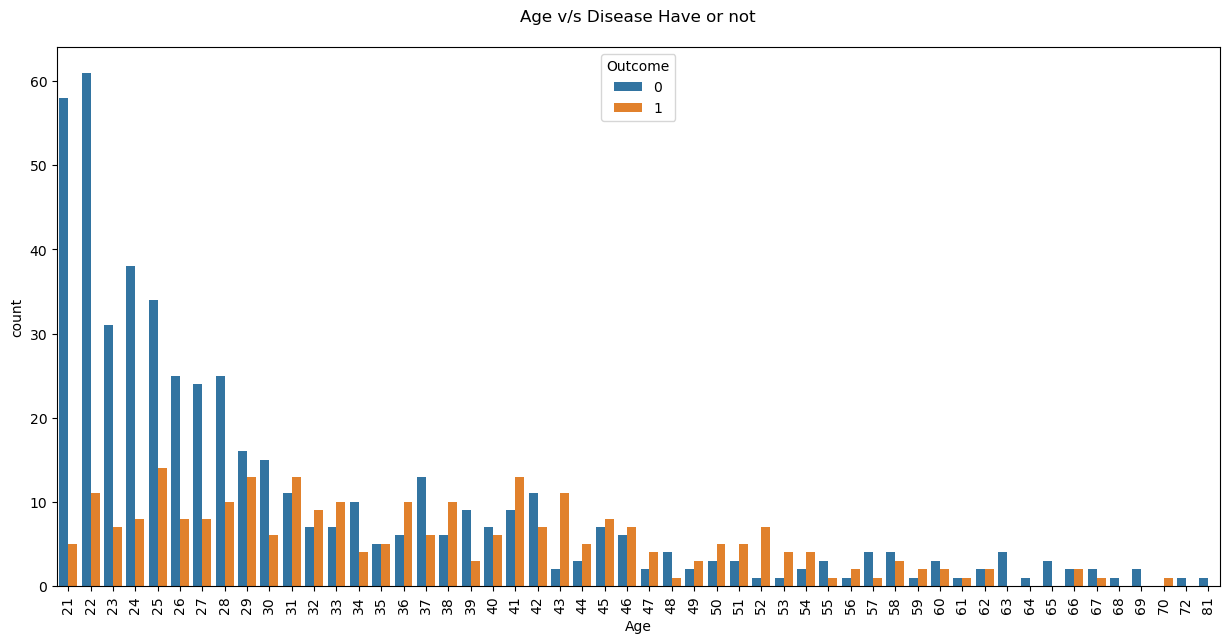

In [23]:
plt.figure(figsize=(15,7))
sns.countplot(data= df, x='Age',hue='Outcome')
plt.title('Age v/s Disease Have or not\n')
plt.xticks(rotation="vertical")
plt.show()

<AxesSubplot:title={'center':'Glucose vs Age And Disease have or not'}, xlabel='Glucose', ylabel='Age'>

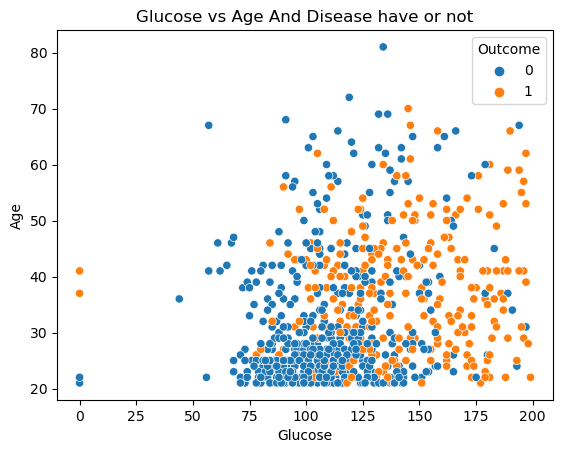

In [24]:
plt.title("Glucose vs Age And Disease have or not")
sns.scatterplot(x = "Glucose", y = "Age", hue = "Outcome" , data=df)

<AxesSubplot:title={'center':'BloodPressure vs Age  And Disease have or not'}, xlabel='BloodPressure', ylabel='Age'>

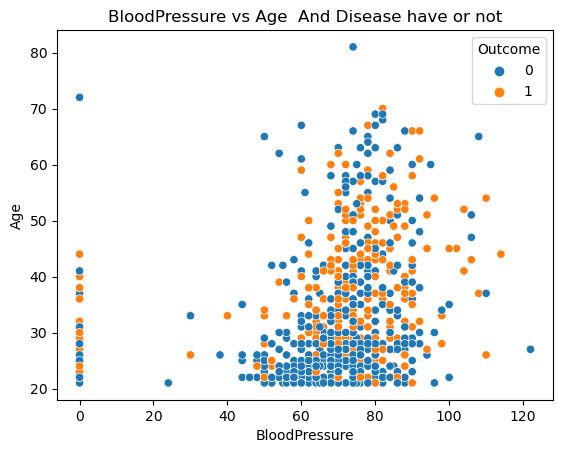

In [25]:
plt.title("BloodPressure vs Age  And Disease have or not")
sns.scatterplot(x = "BloodPressure", y = "Age", hue = "Outcome" , data=df)

<AxesSubplot:title={'center':'SkinThickness vs Age And Disease have or not'}, xlabel='SkinThickness', ylabel='Age'>

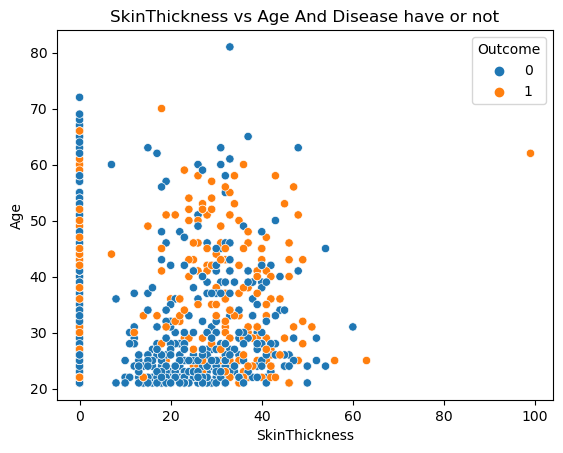

In [26]:
plt.title("SkinThickness vs Age And Disease have or not")
sns.scatterplot(x = "SkinThickness", y = "Age", hue = "Outcome" , data=df)

<AxesSubplot:title={'center':'Insulin vs Age And Disease have or not'}, xlabel='Insulin', ylabel='Age'>

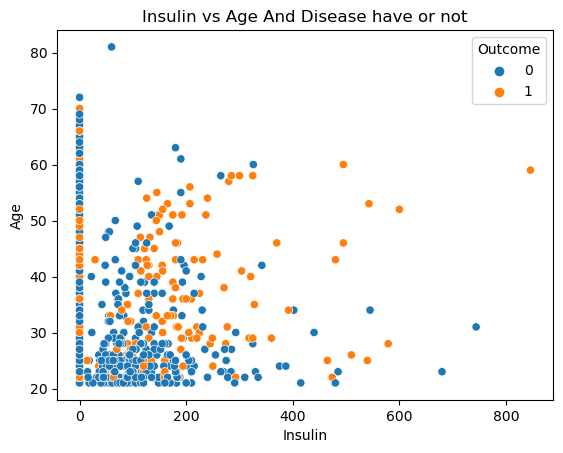

In [27]:
plt.title("Insulin vs Age And Disease have or not")
sns.scatterplot(x = "Insulin", y = "Age", hue = "Outcome" , data=df)

<AxesSubplot:title={'center':'BMI vs Age And Disease have or not'}, xlabel='BMI', ylabel='Age'>

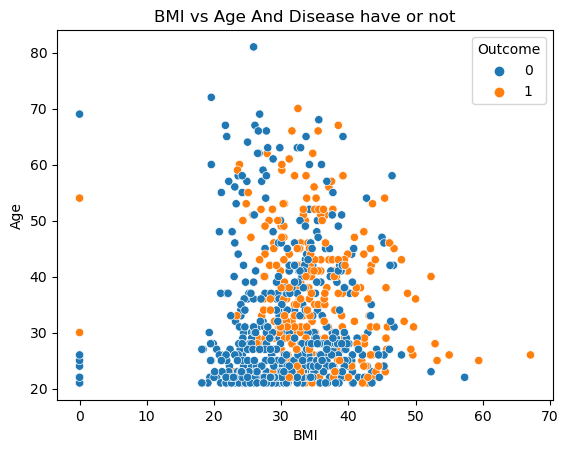

In [28]:
plt.title("BMI vs Age And Disease have or not")
sns.scatterplot(x = "BMI", y = "Age", hue = "Outcome" , data=df)

<AxesSubplot:title={'center':'DiabetesPedigreeFunction vs Age And Disease have or not'}, xlabel='DiabetesPedigreeFunction', ylabel='Age'>

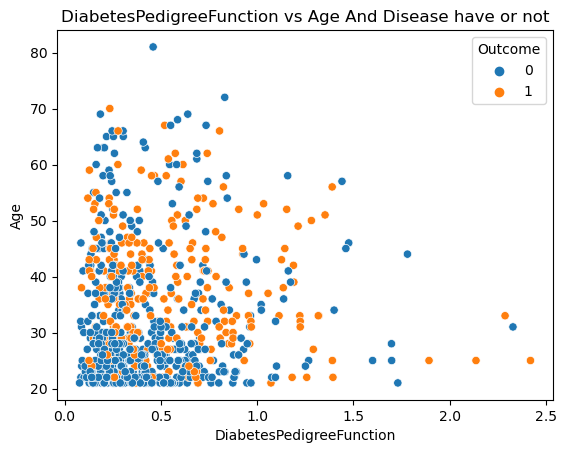

In [29]:
plt.title("DiabetesPedigreeFunction vs Age And Disease have or not")
sns.scatterplot(x = "DiabetesPedigreeFunction", y = "Age", hue = "Outcome" , data=df)

# LOGISTIC REGESSION

In [30]:
#select independent and dependent features
x = df.drop(columns='Outcome', axis=1)
y = df['Outcome']


#split data into training and testing data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, stratify=y ,random_state=12345)


#feature scalling
from sklearn.preprocessing import StandardScaler
  
sc_x = StandardScaler()
x_train = sc_x.fit_transform(x_train)
x_test = sc_x.transform(x_test)


#create object of the model
model = LogisticRegression()



#train the model 
model.fit(x_train, y_train)


#prediction
y_pred = model.predict(x_test)

#classification report and confusion matrix
from sklearn.metrics import confusion_matrix , classification_report
  
cm = confusion_matrix(y_test, y_pred)
print ("Confusion Matrix : \n", cm)
class_report=classification_report(y_test, y_pred )
print("classification_report" ,class_report)

#accuracy score
from sklearn.metrics import accuracy_score
  
print ("Accuracy : ",accuracy_score(y_test, y_pred))





Confusion Matrix : 
 [[133  17]
 [ 36  45]]
classification_report               precision    recall  f1-score   support

           0       0.79      0.89      0.83       150
           1       0.73      0.56      0.63        81

    accuracy                           0.77       231
   macro avg       0.76      0.72      0.73       231
weighted avg       0.77      0.77      0.76       231

Accuracy :  0.7705627705627706


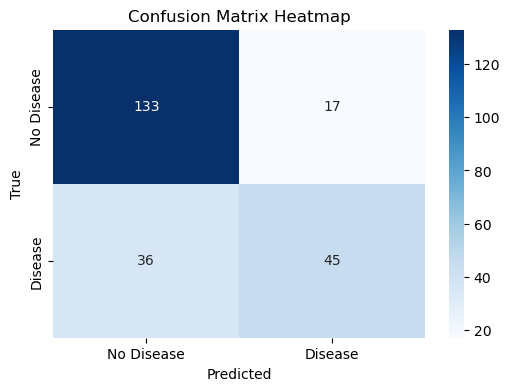

In [31]:
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["No Disease", "Disease"],yticklabels=["No Disease", "Disease"])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix Heatmap')
plt.show()

# DecisionTreeClassifier

In [32]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, stratify=y ,random_state=12345)
from sklearn.preprocessing import StandardScaler
  
sc_x = StandardScaler()
x_train = sc_x.fit_transform(x_train)
x_test = sc_x.transform(x_test)

dtree = DecisionTreeClassifier()

dtree.fit(x_train, y_train)


y_pred = dtree.predict(x_test)
from sklearn.metrics import accuracy_score
  
print ("Accuracy : ",accuracy_score(y_test, y_pred))



Accuracy :  0.71875


# KNeighborsClassifier

In [33]:

from sklearn.model_selection import train_test_split
x_train , x_test , y_train , y_test = train_test_split(x,y , test_size = 0.2 ,random_state= 93)

from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=13)

knn.fit(x_train, y_train)


y_pred = knn.predict(x_test)

from sklearn.metrics import accuracy_score

print ("Accuracy : ",accuracy_score(y_test, y_pred))
from sklearn.metrics import confusion_matrix , classification_report
  
cm = confusion_matrix(y_test, y_pred)
print ("Confusion Matrix : \n", cm)
class_report=classification_report(y_test, y_pred )
print("classification_report" ,class_report)


Accuracy :  0.8116883116883117
Confusion Matrix : 
 [[94  8]
 [21 31]]
classification_report               precision    recall  f1-score   support

           0       0.82      0.92      0.87       102
           1       0.79      0.60      0.68        52

    accuracy                           0.81       154
   macro avg       0.81      0.76      0.77       154
weighted avg       0.81      0.81      0.80       154



C:\Users\Shoban\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


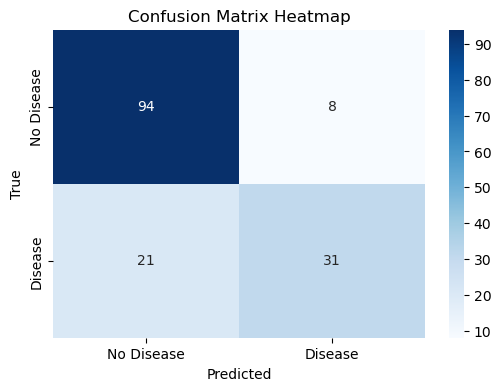

In [34]:
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["No Disease", "Disease"],yticklabels=["No Disease", "Disease"])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix Heatmap')
plt.show()

# RandomForestClassifier

In [35]:
from sklearn.ensemble import RandomForestClassifier


x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, stratify=y ,random_state=160)
clf = RandomForestClassifier(n_estimators = 22)  

clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)

from sklearn import metrics  

print("ACCURACY OF THE MODEL: ",  metrics.accuracy_score(y_test, y_pred))
class_report=classification_report(y_test, y_pred )
print("classification_report" ,class_report)


ACCURACY OF THE MODEL:  0.8506493506493507
classification_report               precision    recall  f1-score   support

           0       0.85      0.93      0.89       100
           1       0.84      0.70      0.77        54

    accuracy                           0.85       154
   macro avg       0.85      0.82      0.83       154
weighted avg       0.85      0.85      0.85       154



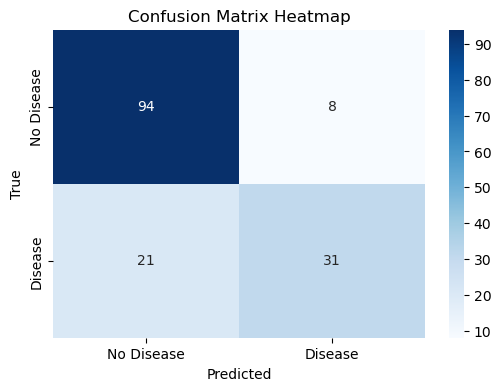

In [36]:
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["No Disease", "Disease"],yticklabels=["No Disease", "Disease"])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix Heatmap')
plt.show()

In [37]:
#save the model
import pickle
filename="Save models/diabetes.sav"
pickle.dump(clf , open(filename , "wb"))
loadmodel=pickle.load(open(filename,'rb'))

In [40]:
#creating prediction system 

input_data = (10,115,0,0,0,35.3,0.134,29)

# change the input data to a numpy array
input_data_as_numpy_array= np.asarray(input_data)

# reshape the numpy array as we are predicting for only on instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = loadmodel.predict(input_data_reshaped)
# print(prediction)

if (prediction[0]== 0):
    print('The Person does not have a  Diabetes')
else:
  print('The Person has Diabetes')

The Person does not have a  Diabetes


C:\Users\Shoban\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
